In [1]:
import json
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter
from google_play_scraper import Sort, reviews, app
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [2]:
#Here I collected information for Binance under the category "Finance". Specifically I will be focusing on Binance.
app_packages = [
    "com.binance.dev" #Binance
   # 'com.paypal.android.p2pmobile', #Paypal
    #'co.mona.android', #Crypto.com
    #'piuk.blockchain.android', #blockchain.com wallet
    #'com.wallet.crypto.trustapp', #trust crypto wallet
    #'com.coinbase.android'
]

In [3]:
len(app_packages)

1

In [4]:
app_infos= []
for ap in tqdm(app_packages):
    info = app(ap, lang='en', country='US') # from the US markert
    del info['comments']
    app_infos.append(info)

100%|██████████| 1/1 [00:00<00:00,  1.11it/s]


In [5]:
def print_json(json_object):
    json_str = json.dumps(
        json_object, 
        indent=2, 
        sort_keys=True, 
        default=str
    )
    print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [6]:
print_json(app_infos[0])

{
  "adSupported": null,
  "androidVersion": "5.0",
  "androidVersionText": "5.0 and up",
  "appId": "com.binance.dev",
  "containsAds": false,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "Welcome to the World\u2019s #1 cryptocurrency platform by trading volume!  \r\n\r\nTrusted by millions of users worldwide. Get started today and buy Bitcoin, Ethereum, Link, Tezos, Cardano and Binance Coin, and more, all with some of the lowest fees in crypto. \r\n\r\nBinance App is available only to non-U.S. citizens and residents. For U.S. citizens and residents, please install Binance.US App.\r\n\r\n\r\nHere's what you can do on Binance App::\r\n\r\n\r\n<b>LOOKING TO BUY OR SELL BITCOIN AND OTHER CRYPTO?  THAT'S WHAT WE SPECIALIZE IN</b>\r\n\r\nShop Bitcoin, Ethereum, Bitcoin Cash, Litecoin, and more. Simply add a debit or credit card to buy and sell crypto instantly. \r\n\r\n\r\n<b>WANT TO BE ABLE TO TRADE MORE THAN JUST BITCOIN AND ETH

In [7]:
# This is an example of the function google_play_scraper.reviews
result, continuation_token = reviews(
    'com.fantome.penguinisle',
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
    count=1, # defaults to 100
    filter_score_with=5 # defaults to None(means all score)
)
result

[{'reviewId': 'gp:AOqpTOF29heMGWmVZ9LcHNRjZov5mCzBUFiXFteZ48bZ5wcJxT4yNqrjAEnsLTNFtRKRuRgz97d8Y1YZnPUm-Ks',
  'userName': 'Shylynn Wolfgang',
  'userImage': 'https://play-lh.googleusercontent.com/a-/AOh14GivhoBdxXkgflBydXNWanu_dnnsVaBeWi6JRcjt6w',
  'content': "I LOVE this game. There's no energy or anything so you can literally play for hours. Its calm and relaxed and just beautiful. You can purchase things, but it's definitely not a requirement like most games. There's also no pop-up annoying ads. Only thing I DONT like is the penguins like to hangout with the same species, there will be like 10 Macaroni penguins hanging out together. But all the species do it. Also, they tend to stay on the main island so there will only be a few on the other island",
  'score': 5,
  'thumbsUpCount': 45,
  'reviewCreatedVersion': '1.32.1',
  'at': datetime.datetime(2021, 3, 28, 8, 35, 32),
  'replyContent': None,
  'repliedAt': None}]

In [8]:
app_reviews = []

# Loop through all the app packages and collect review for each of them
for ap in tqdm(app_packages):
    for score in list(range(1, 6)):
        for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
            rvs, _ = reviews(
                ap,
                lang='en',
                country='uk',
                sort=sort_order,
                count= 150 if score == 3 else 200,
                filter_score_with=score
            )
        for r in rvs:
            r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
            r['appId'] = ap

        app_reviews.extend(rvs)

100%|██████████| 1/1 [00:12<00:00, 12.12s/it]


In [9]:
print_json(app_reviews[0])

{
  "appId": "com.binance.dev",
  "at": "2021-04-03 00:15:56",
  "content": "Downloaded, had me look for country code, us and all of north America not listed, seems sketch. Dont trust it",
  "repliedAt": null,
  "replyContent": null,
  "reviewCreatedVersion": null,
  "reviewId": "gp:AOqpTOFZ3E6mHZMNDkFzWrcs5zEbkqZpl7ZHxkma2mQybpIK8xbTOIxDTqbEa5jI2gCZzr6l6ajm1-y-s0pkH7g",
  "score": 1,
  "sortOrder": "newest",
  "thumbsUpCount": 0,
  "userImage": "https://play-lh.googleusercontent.com/-DugbcvT7SL4/AAAAAAAAAAI/AAAAAAAAAAA/AMZuuclKCpHKA_n1Vz-mF4RmBjaLRWAWug/photo.jpg",
  "userName": "Ga Si"
}



In [10]:
print("We were able to scrap: ", len(app_reviews), " reviews")

We were able to scrap:  950  reviews


In [11]:
# Save app reviews in a CSV format
df = pd.DataFrame(app_reviews)
df.to_csv('./binance.csv', index=None, header=True)

# Data Preview and Analysis
Here, We preview the data, clean it, and also divide it by the scores for easier analysis and better insight!

In [12]:
import pandas as pd
import os
import gensim
import warnings
warnings.filterwarnings('ignore')

C:\Users\Abodunde Ojo\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


**Cleaning The dataset**

In [13]:
#Here we Remove puntuations 
import re
df['content'] = df['content'].map(lambda x: re.sub('[,\.!?]', '', x))

In [14]:
#here we normalize the dataset by converting it to lowercase
df['content'] = df['content'].map(lambda x: x.lower())

**Division of the dataset by scores**

In [15]:
#Reviews for One Star Reviews. 
score = [1]
one_score = df[df['score'].isin(score)]

In [16]:
#Reviews for two Star Reviews. 
score = [2]
two_score = df[df['score'].isin(score)]
#two_score.head()

In [17]:
#Reviews for three Star Reviews. 
score = [3]
three_score = df[df['score'].isin(score)]
#three_score.head()

In [18]:
#Reviews for four Star Reviews. 
score = [4]
four_score = df[df['score'].isin(score)]
#four_score.head()

In [19]:
#Reviews for five Star Reviews. 
score = [5]
five_score = df[df['score'].isin(score)]
#five_score.head()

In [20]:
#Here we import the necessary libraries
from wordcloud import WordCloud
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import gensim.corpora as corpora
WNlemma = nltk.WordNetLemmatizer()
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords

In [22]:
#Here we recall the english stop words and extend it by words that might be irrelevant to the study such as the name of the company#
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'binance', ","])

In [21]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

**Modeling Using all the reviews**

In [23]:
# Join the different processed titles together.
dict_long_string = ','.join(list(df['content'].values))

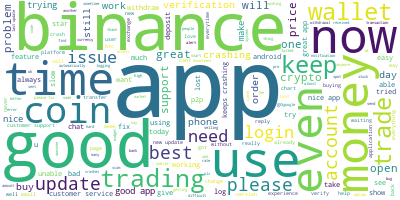

In [24]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud on the preprocessed data
wordcloud.generate(dict_long_string)

# Visualize the word cloud to have an idea about the issues
wordcloud.to_image()

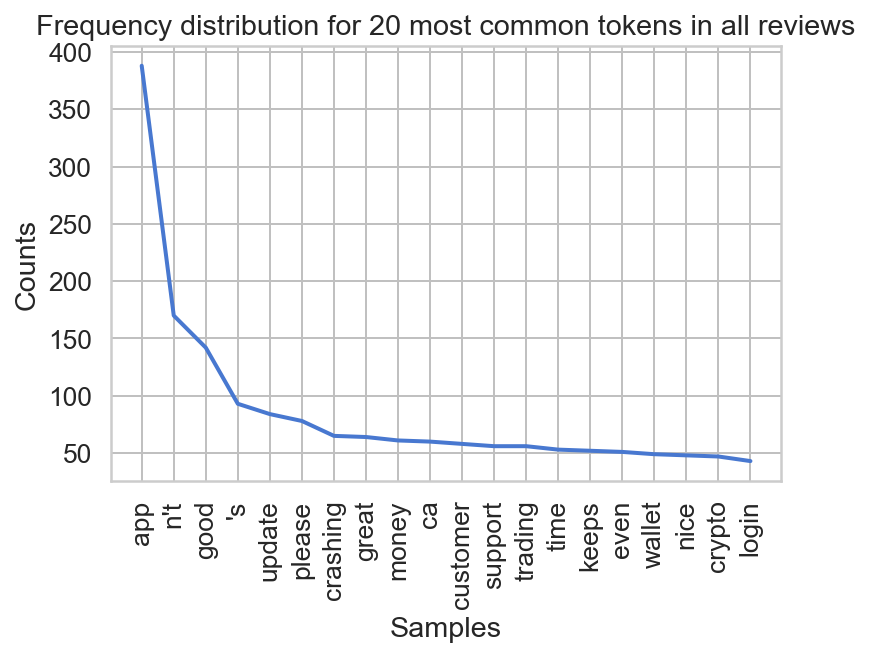

<AxesSubplot:title={'center':'Frequency distribution for 20 most common tokens in all reviews'}, xlabel='Samples', ylabel='Counts'>

In [25]:
# we also do a little tokenizing here to understand the frequency distribution of the words. 

dict_long_stringmc = dict_long_string.lower()
dict_long_stringmc_token = nltk.word_tokenize(dict_long_stringmc)

sorted_dict = [word for word in dict_long_stringmc_token 
             if word not in stop_words]


fdist = FreqDist(sorted_dict)

fdist.plot(20,title='Frequency distribution for 20 most common tokens in all reviews')

In [26]:
#Dictionary Data
dict_data = df.content.values.tolist()
dict_data_words = list(sent_to_words(dict_data))
# remove stop words
dict_data_words = remove_stopwords(dict_data_words)
print(dict_data_words[:1][0][:30])

['downloaded', 'look', 'country', 'code', 'us', 'north', 'america', 'listed', 'seems', 'sketch', 'dont', 'trust']


In [27]:
dict_id2word = corpora.Dictionary(dict_data_words)
# Create Corpus
dict_texts = dict_data_words
# Term Document Frequency
dict_corpus = [dict_id2word.doc2bow(text) for text in dict_texts]
# View
print(dict_corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]


In [30]:
# number of topics
from pprint import pprint
num_topics = 10
# Build LDA model
dict_lda_model = gensim.models.LdaMulticore(corpus=dict_corpus,
                                       id2word=dict_id2word,
                                       num_topics=10)
# Print the Keyword in the 10 topics
pprint(dict_lda_model.print_topics())
dict_doc_lda = dict_lda_model[dict_corpus]

[(0,
  '0.024*"good" + 0.014*"app" + 0.009*"time" + 0.008*"support" + '
  '0.008*"please" + 0.007*"get" + 0.007*"update" + 0.006*"since" + '
  '0.006*"usdt" + 0.006*"try"'),
 (1,
  '0.031*"app" + 0.015*"nice" + 0.011*"good" + 0.010*"best" + 0.009*"update" + '
  '0.008*"crashing" + 0.007*"please" + 0.007*"support" + 0.007*"working" + '
  '0.007*"days"'),
 (2,
  '0.036*"app" + 0.020*"good" + 0.010*"even" + 0.009*"able" + 0.009*"crashing" '
  '+ 0.007*"issue" + 0.007*"keeps" + 0.007*"please" + 0.006*"tried" + '
  '0.006*"update"'),
 (3,
  '0.029*"app" + 0.009*"verification" + 0.009*"buy" + 0.008*"well" + '
  '0.008*"sell" + 0.007*"bad" + 0.007*"order" + 0.005*"customer" + '
  '0.005*"good" + 0.005*"work"'),
 (4,
  '0.049*"app" + 0.026*"good" + 0.012*"update" + 0.012*"great" + '
  '0.011*"crypto" + 0.009*"nice" + 0.008*"best" + 0.008*"please" + '
  '0.008*"login" + 0.007*"wallet"'),
 (5,
  '0.034*"app" + 0.012*"please" + 0.011*"trading" + 0.010*"crashing" + '
  '0.010*"good" + 0.009*"trade

In [31]:
word_dict = {};
for i in range(num_topics):
    words = dict_lda_model.show_topic(i, topn = 20)
    word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,good,app,app,app,app,app,app,app,app,app
1,app,nice,good,verification,good,please,money,good,best,update
2,time,good,even,buy,update,trading,price,great,nice,better
3,support,best,able,well,great,crashing,update,money,great,login
4,please,update,crashing,sell,crypto,good,trading,crashing,trading,customer
5,get,crashing,issue,bad,nice,trade,withdraw,like,buy,always
6,update,please,keeps,order,best,time,lost,please,update,times
7,since,support,please,customer,please,support,please,keeps,user,great
8,usdt,working,tried,good,login,problem,keeps,wallet,money,many
9,try,days,update,work,wallet,open,trade,account,easy,wallet


In [32]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
import pyLDAvis.sklearn
from IPython.core.display import HTML
import warnings
warnings.filterwarnings('ignore')
# Visualize the topics
pyLDAvis.enable_notebook() 
LDAvis_prepared = gensimvis.prepare(dict_lda_model, dict_corpus, dict_id2word)
#p = pyLDAvis.display(LDAvis_prepared, template_type='notebook') 
# pyLDAvis.display is not working so i would just save the data to a html instead. 
pyLDAvis.save_html(LDAvis_prepared, 'lda_overview.html')

C:\Users\Abodunde Ojo\anaconda3\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


# Topic Modelling for One Star Reviews


In [33]:
# Join the different processed titles together.
long_string = ','.join(list(one_score['content'].values))

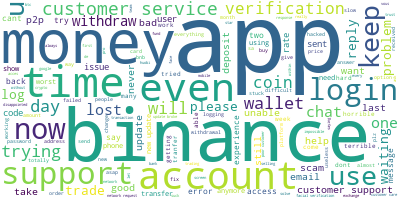

In [34]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud on the preprocessed data
wordcloud.generate(long_string)

# Visualize the word cloud to have an idea about the issues
wordcloud.to_image()

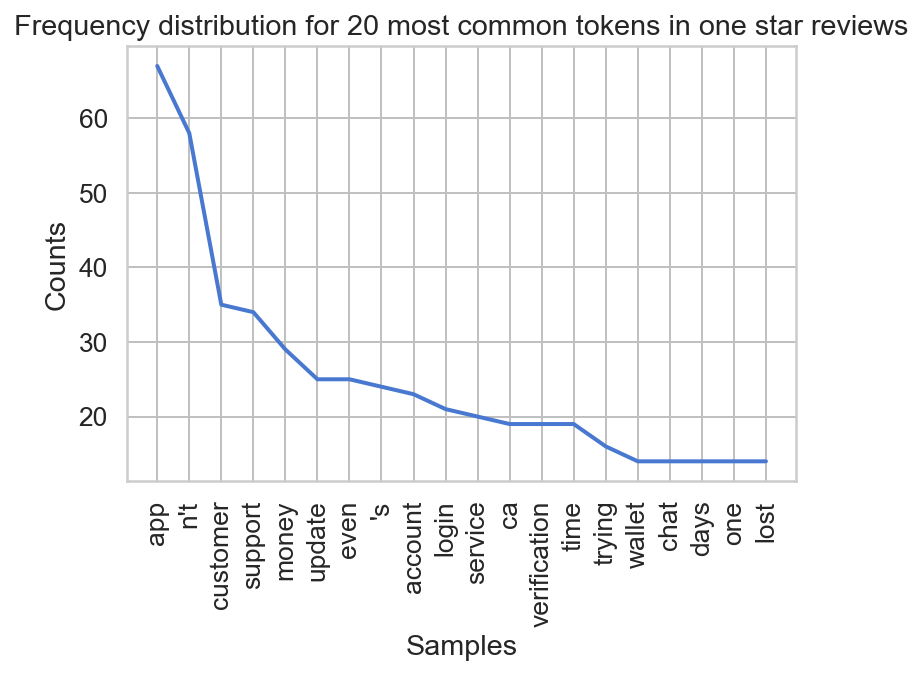

<AxesSubplot:title={'center':'Frequency distribution for 20 most common tokens in one star reviews'}, xlabel='Samples', ylabel='Counts'>

In [35]:
# we also do a little tokenizing here to understand the frequency distribution of the words. 

long_stringmc = long_string.lower()
long_stringmc_token = nltk.word_tokenize(long_stringmc)

sorted_1 = [word for word in long_stringmc_token 
             if word not in stop_words]


fdist = FreqDist(sorted_1)

fdist.plot(20,title='Frequency distribution for 20 most common tokens in one star reviews')

In [36]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = one_score.content.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['downloaded', 'look', 'country', 'code', 'us', 'north', 'america', 'listed', 'seems', 'sketch', 'dont', 'trust']


In [37]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]


# **

In [ ]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=dict_id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

# **

In [38]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.015*"lost" + 0.013*"money" + 0.011*"email" + 0.011*"plz" + 0.010*"app" + '
  '0.009*"withdrawal" + 0.009*"login" + 0.009*"account" + 0.009*"still" + '
  '0.009*"verification"'),
 (1,
  '0.046*"app" + 0.025*"update" + 0.018*"login" + 0.017*"new" + 0.011*"sa" + '
  '0.011*"problem" + 0.011*"please" + 0.008*"last" + 0.008*"verification" + '
  '0.008*"want"'),
 (2,
  '0.017*"app" + 0.015*"one" + 0.013*"update" + 0.012*"account" + '
  '0.012*"service" + 0.011*"good" + 0.010*"customer" + 0.009*"money" + '
  '0.009*"help" + 0.008*"support"'),
 (3,
  '0.024*"customer" + 0.021*"support" + 0.016*"chat" + 0.015*"trying" + '
  '0.014*"money" + 0.014*"waiting" + 0.014*"time" + 0.013*"days" + 0.012*"get" '
  '+ 0.011*"service"'),
 (4,
  '0.016*"update" + 0.012*"wallet" + 0.012*"new" + 0.010*"support" + '
  '0.009*"app" + 0.009*"submit" + 0.008*"account" + 0.008*"ada" + 0.008*"many" '
  '+ 0.008*"chat"'),
 (5,
  '0.018*"even" + 0.012*"wallet" + 0.011*"customer" + 0.011*"update" + '
  '0.011

In [39]:
word_dict = {};
for i in range(num_topics):
    words = lda_model.show_topic(i, topn = 20)
    word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,lost,app,app,customer,update,even,app,app,customer,app
1,money,update,one,support,wallet,wallet,money,reply,support,account
2,email,login,update,chat,new,customer,withdraw,customer,app,sent
3,plz,new,account,trying,support,update,times,login,even,money
4,app,sa,service,money,app,logging,artists,verification,service,withdraw
5,withdrawal,problem,good,waiting,submit,app,trying,support,password,support
6,login,please,customer,time,account,screen,keep,days,worst,customer
7,account,last,money,days,ada,time,need,chat,selling,coins
8,still,verification,help,get,many,service,thieves,scam,bad,bank
9,verification,want,support,service,chat,log,keeps,never,account,since


In [40]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.41242683681541975


In [41]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
import pyLDAvis.sklearn
from IPython.core.display import HTML
# Visualize the topics
pyLDAvis.enable_notebook() 
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
#p = pyLDAvis.display(LDAvis_prepared, template_type='notebook') 
# pyLDAvis.display is not working so i would just save the data to a html instead. 
pyLDAvis.save_html(LDAvis_prepared, 'lda.html')

In [42]:
# Join the different processed titles together.
#long_string = ','.join(list(one_score['content'].values)) 
    

#Here we define a general function for preprocessing our data    
#def preprocess(sentence):
#    sentence=str(sentence)
#    sentence = sentence.lower()
#    sentence=sentence.replace('{html}',"") 
#    cleanr = re.compile('<.*?>')
#    cleantext = re.sub(cleanr, '', sentence)
#    rem_url=re.sub(r'http\S+', '',cleantext)
#    rem_num = re.sub('[0-9]+', '', rem_url)
#    tokenizer = RegexpTokenizer(r'\w+')
#    tokens = tokenizer.tokenize(rem_num)  
#    filtered_words = [w for w in tokens if len(w) > 2 if not w in stop_words]
#    #stem_words=[WNlemma.stem(w) for w in filtered_words]
#    lemma_words=[WNlemma.lemmatize(w) for w in filtered_words]
#    return " ".join(filtered_words)#

# Topic Modelling for Two Star Reviews : We basically repeat the same process above
Having gotten the topics for one star reviews, we move next to two star reviews and see what the major topic might be and if it is different from one star reviews.

In [43]:
# Join the different processed titles together.
long_string_two = ','.join(list(two_score['content'].values))

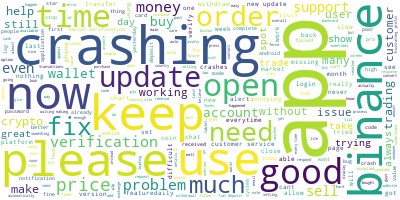

In [44]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud on the preprocessed data
wordcloud.generate(long_string_two)

# Visualize the word cloud to have an idea about the issues
wordcloud.to_image()

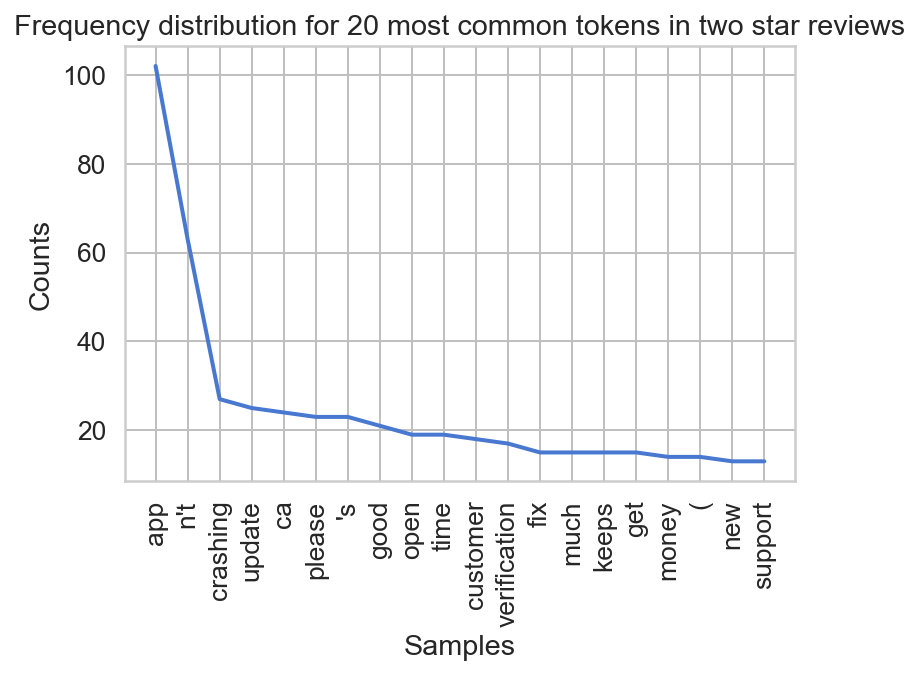

<AxesSubplot:title={'center':'Frequency distribution for 20 most common tokens in two star reviews'}, xlabel='Samples', ylabel='Counts'>

In [45]:
long_stringmc2 = long_string_two.lower()
long_stringmc_token2 = nltk.word_tokenize(long_stringmc2)

sorted_2 = [word for word in long_stringmc_token2 
             if word not in stop_words]


fdist2 = FreqDist(sorted_2)

fdist2.plot(20,title='Frequency distribution for 20 most common tokens in two star reviews')

In [46]:
data_two = two_score.content.values.tolist()
data_words_two = list(sent_to_words(data_two))
# remove stop words
data_words_two = remove_stopwords(data_words_two)
print(data_words_two[:1][0][:30])

['people', 'said', 'good', 'wallet', 'like', 'scanned', 'wallet', 'receive', 'withdrawal', 'found', 'said', 'bad', 'wallet']


In [47]:
id2word_2 = corpora.Dictionary(data_words_two)
# Create Corpus
texts_2 = data_words_two
# Term Document Frequency
corpus_2 = [id2word_2.doc2bow(text) for text in texts_2]
# View
print(corpus_2[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 3), (9, 1)]


In [48]:
# Build LDA model
lda_model_2 = gensim.models.LdaMulticore(corpus=corpus_2,
                                       id2word=id2word_2,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model_2.print_topics())
doc_lda_2 = lda_model_2[corpus]

[(0,
  '0.046*"app" + 0.012*"update" + 0.011*"please" + 0.011*"crashing" + '
  '0.011*"wallet" + 0.010*"sell" + 0.009*"good" + 0.009*"fix" + '
  '0.008*"password" + 0.008*"face"'),
 (1,
  '0.012*"good" + 0.011*"much" + 0.011*"support" + 0.008*"platform" + '
  '0.008*"get" + 0.008*"staff" + 0.007*"respond" + 0.007*"understand" + '
  '0.007*"crashing" + 0.007*"chat"'),
 (2,
  '0.024*"update" + 0.017*"app" + 0.012*"new" + 0.011*"account" + 0.009*"card" '
  '+ 0.009*"open" + 0.009*"many" + 0.008*"chart" + 0.007*"also" + '
  '0.006*"much"'),
 (3,
  '0.017*"crashing" + 0.012*"keeps" + 0.012*"app" + 0.008*"customer" + '
  '0.008*"response" + 0.008*"days" + 0.007*"could" + 0.007*"difficult" + '
  '0.007*"get" + 0.007*"account"'),
 (4,
  '0.046*"app" + 0.009*"like" + 0.009*"order" + 0.008*"open" + 0.008*"crashes" '
  '+ 0.008*"lite" + 0.008*"trading" + 0.007*"much" + 0.007*"crypto" + '
  '0.007*"great"'),
 (5,
  '0.027*"app" + 0.015*"phone" + 0.013*"make" + 0.011*"deposit" + '
  '0.010*"crashin

In [49]:
word_dict = {};
for i in range(num_topics):
    words = lda_model_2.show_topic(i, topn = 20)
    word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,app,good,update,crashing,app,app,app,app,arabic,app
1,update,much,app,keeps,like,phone,customer,verification,app,always
2,please,support,new,app,order,make,crashing,please,started,open
3,crashing,platform,account,customer,open,deposit,good,tablet,crashing,time
4,wallet,get,card,response,crashes,crashing,keeps,feature,order,working
5,sell,staff,open,days,lite,need,even,trying,live,trade
6,good,respond,many,could,trading,see,money,money,good,fix
7,fix,understand,chart,difficult,much,fiat,transfer,need,cant,press
8,password,crashing,also,get,crypto,please,buy,would,trading,everytime
9,face,chat,much,account,great,show,time,version,still,buttons


In [50]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared_2 = gensimvis.prepare(lda_model_2, corpus_2, id2word_2)
#pyLDAvis.display(LDAvis_prepared_2, template_type='notebook')
pyLDAvis.save_html(LDAvis_prepared_2, 'lda2.html')

# Topic Modelling for Three Star Reviews

In [51]:
# Join the different processed titles together.
long_string_3 = ','.join(list(three_score['content'].values))

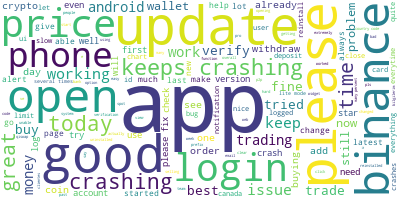

In [52]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud on the preprocessed data
wordcloud.generate(long_string_3)

# Visualize the word cloud to have an idea about the issues
wordcloud.to_image()

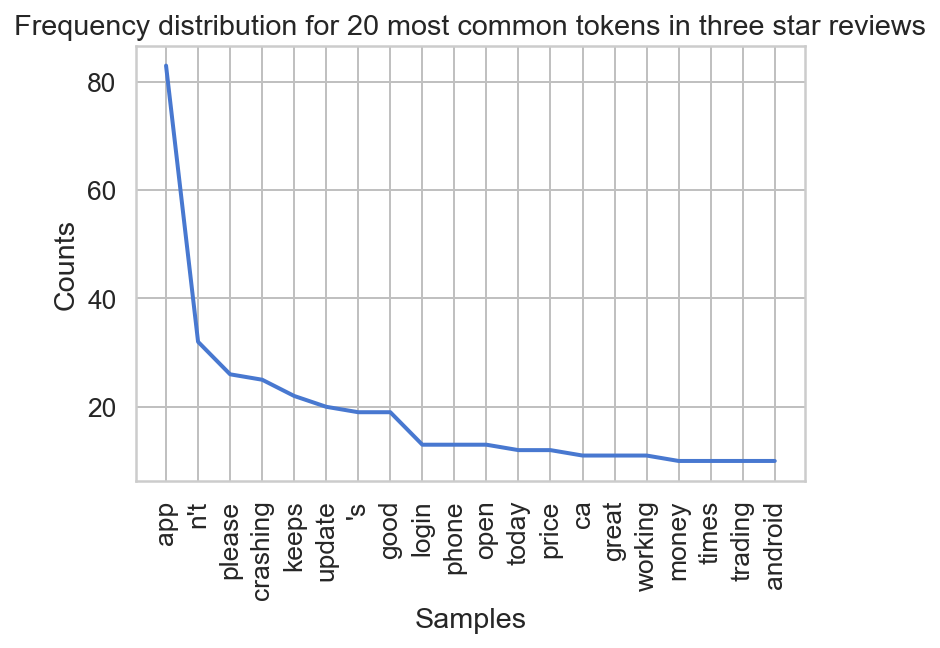

<AxesSubplot:title={'center':'Frequency distribution for 20 most common tokens in three star reviews'}, xlabel='Samples', ylabel='Counts'>

In [53]:
long_stringmc3 = long_string_3.lower()
long_stringmc_token3 = nltk.word_tokenize(long_stringmc3)

sorted_3 = [word for word in long_stringmc_token3 
             if word not in stop_words]


fdist3 = FreqDist(sorted_3)

fdist3.plot(20,title='Frequency distribution for 20 most common tokens in three star reviews')

In [54]:
data_3 = three_score.content.values.tolist()
data_words_3 = list(sent_to_words(data_3))
# remove stop words
data_words_3 = remove_stopwords(data_words_3)
print(data_words_3[:1][0][:30])

['facing', 'problem', 'logout', 'days', 'whenever', 'login', 'automatically', 'log', 'solution']


In [55]:
id2word_3 = corpora.Dictionary(data_words_3)
# Create Corpus
texts_3 = data_words_3
# Term Document Frequency
corpus_3 = [id2word_3.doc2bow(text) for text in texts_3]
# View
print(corpus_3[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


In [56]:
# Build LDA model
lda_model_3 = gensim.models.LdaMulticore(corpus=corpus_3,
                                       id2word=id2word_3,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model_3.print_topics())
doc_lda_3 = lda_model_3[corpus]

[(0,
  '0.020*"trading" + 0.020*"great" + 0.014*"app" + 0.012*"one" + 0.012*"star" '
  '+ 0.012*"qiswap" + 0.012*"please" + 0.010*"keeps" + 0.010*"wallet" + '
  '0.009*"update"'),
 (1,
  '0.026*"app" + 0.016*"verify" + 0.012*"easy" + 0.011*"nigeria" + '
  '0.011*"expired" + 0.011*"withdraw" + 0.011*"every" + 0.011*"code" + '
  '0.011*"nin" + 0.011*"bnb"'),
 (2,
  '0.028*"update" + 0.023*"good" + 0.020*"keeps" + 0.019*"crashing" + '
  '0.017*"app" + 0.016*"working" + 0.013*"money" + 0.009*"phone" + '
  '0.009*"time" + 0.008*"since"'),
 (3,
  '0.024*"price" + 0.017*"app" + 0.013*"percent" + 0.013*"many" + '
  '0.013*"buying" + 0.013*"check" + 0.012*"buy" + 0.011*"good" + '
  '0.011*"update" + 0.011*"phone"'),
 (4,
  '0.053*"app" + 0.022*"login" + 0.018*"update" + 0.017*"keeps" + 0.015*"mode" '
  '+ 0.015*"crashing" + 0.013*"working" + 0.013*"fine" + 0.012*"country" + '
  '0.012*"canada"'),
 (5,
  '0.053*"app" + 0.019*"please" + 0.016*"android" + 0.013*"issue" + '
  '0.013*"keeps" + 0.013

In [57]:
word_dict = {};
for i in range(num_topics):
    words = lda_model_3.show_topic(i, topn = 20)
    word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,trading,app,update,price,app,app,app,app,please,app
1,great,verify,good,app,login,please,please,crashing,app,crashing
2,app,easy,keeps,percent,update,android,coin,bilgilerim,good,order
3,one,nigeria,crashing,many,keeps,issue,help,good,since,times
4,star,expired,app,buying,mode,keeps,today,price,fix,keeps
5,qiswap,withdraw,working,check,crashing,tried,phone,see,withdraw,changed
6,please,every,money,buy,working,times,first,open,work,change
7,keeps,code,phone,good,fine,account,still,able,today,best
8,wallet,nin,time,update,country,verify,crash,alert,verify,android
9,update,bnb,since,phone,canada,using,open,update,add,new


In [59]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared_3 = gensimvis.prepare(lda_model_3, corpus_3, id2word_3)
#pyLDAvis.display(LDAvis_prepared_3, template_type='notebook')
# pyLDAvis.display is not working so i would just save the data to a html instead. 
pyLDAvis.save_html(LDAvis_prepared_3, 'lda3.html')

# Topic Modeling for Four Star Reviews

In [60]:
# Join the different processed titles together.
long_string_4 = ','.join(list(four_score['content'].values))

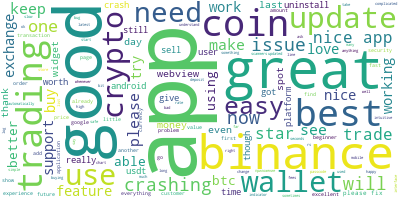

In [61]:

# Generate a word cloud on the preprocessed data
wordcloud.generate(long_string_4)

# Visualize the word cloud to have an idea about the issues
wordcloud.to_image()

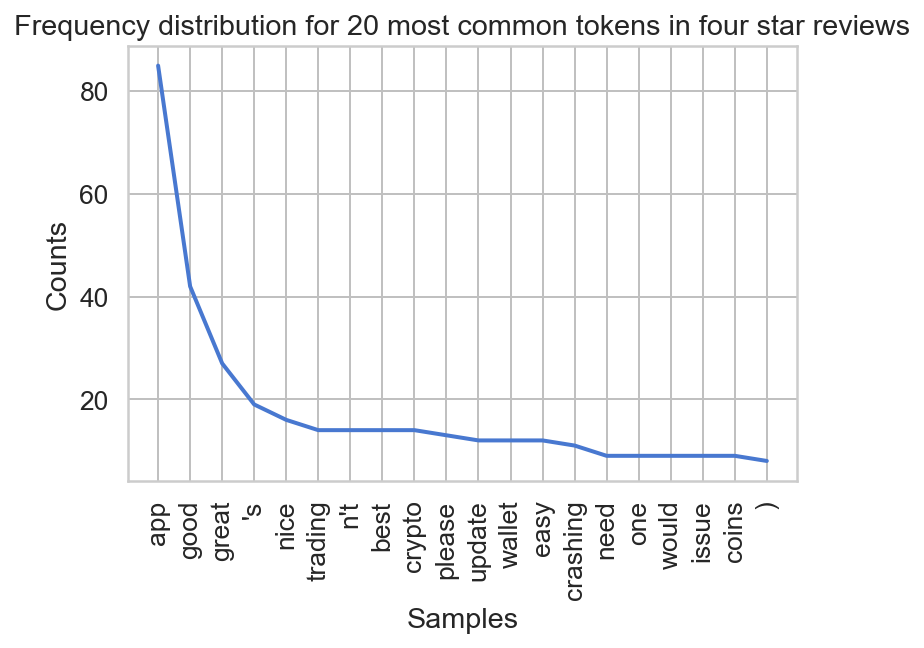

<AxesSubplot:title={'center':'Frequency distribution for 20 most common tokens in four star reviews'}, xlabel='Samples', ylabel='Counts'>

In [62]:
long_stringmc4 = long_string_4.lower()
long_stringmc_token4 = nltk.word_tokenize(long_stringmc4)

sorted_4 = [word for word in long_stringmc_token4 
             if word not in stop_words]


fdist4 = FreqDist(sorted_4)

fdist4.plot(20,title='Frequency distribution for 20 most common tokens in four star reviews')

In [63]:
data_4 = four_score.content.values.tolist()
data_words_4 = list(sent_to_words(data_4))
# remove stop words
data_words_4 = remove_stopwords(data_words_4)
print(data_words_4[:1][0][:30])

['mobile', 'app', 'better', 'desktop', 'app', 'honest', 'however', 'following', 'improved', 'show', 'order', 'line', 'graph', 'price', 'buy', 'sell', 'limit', 'order', 'placed', 'buy', 'sell', 'page', 'additon', 'showing', 'amount', 'coin', 'want', 'spendalso', 'calculate', 'fiat']


In [64]:
id2word_4 = corpora.Dictionary(data_words_4)
# Create Corpus
texts_4 = data_words_4
# Term Document Frequency
corpus_4 = [id2word_4.doc2bow(text) for text in texts_4]
# View
print(corpus_4[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 3), (4, 2), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 3), (28, 1), (29, 1)]


In [65]:
# Build LDA model
lda_model_4 = gensim.models.LdaMulticore(corpus=corpus_4,
                                       id2word=id2word_4,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model_4.print_topics())
doc_lda_4 = lda_model_4[corpus]

[(0,
  '0.017*"app" + 0.017*"great" + 0.016*"good" + 0.015*"support" + '
  '0.015*"wallet" + 0.014*"npxs" + 0.012*"need" + 0.012*"crypto" + '
  '0.011*"scammers" + 0.011*"make"'),
 (1,
  '0.037*"app" + 0.027*"great" + 0.012*"features" + 0.012*"easy" + '
  '0.012*"security" + 0.012*"crypto" + 0.011*"please" + 0.010*"crashing" + '
  '0.010*"everything" + 0.010*"whenever"'),
 (2,
  '0.016*"app" + 0.014*"widget" + 0.013*"line" + 0.013*"feature" + '
  '0.010*"user" + 0.010*"interface" + 0.009*"wallet" + 0.007*"update" + '
  '0.007*"even" + 0.007*"little"'),
 (3,
  '0.057*"app" + 0.040*"good" + 0.016*"try" + 0.014*"trading" + 0.012*"wallet" '
  '+ 0.009*"keep" + 0.009*"working" + 0.009*"please" + 0.008*"crashing" + '
  '0.008*"crypto"'),
 (4,
  '0.068*"app" + 0.020*"nice" + 0.015*"best" + 0.014*"great" + 0.013*"good" + '
  '0.013*"would" + 0.011*"crypto" + 0.011*"work" + 0.010*"one" + '
  '0.009*"приложение"'),
 (5,
  '0.016*"fast" + 0.016*"eap" + 0.011*"app" + 0.009*"able" + 0.009*"bank" + 

In [66]:
word_dict = {};
for i in range(num_topics):
    words = lda_model_4.show_topic(i, topn = 20)
    word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,app,app,app,app,app,fast,app,app,good,great
1,great,great,widget,good,nice,eap,usdt,please,app,app
2,good,features,line,try,best,app,worth,crashing,atr,good
3,support,easy,feature,trading,great,able,rs,coins,من,easy
4,wallet,security,user,wallet,good,bank,using,webview,best,trading
5,npxs,crypto,interface,keep,would,good,see,good,happy,btc
6,need,please,wallet,working,crypto,best,love,update,interface,buy
7,crypto,crashing,update,please,work,update,webview,google,user,platform
8,scammers,everything,even,crashing,one,please,update,order,crypto,sell
9,make,whenever,little,crypto,приложение,suddenly,go,problem,nice,nice


In [67]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared_4 = gensimvis.prepare(lda_model_4, corpus_4, id2word_4)
#pyLDAvis.display(LDAvis_prepared_4, template_type='notebook')
# pyLDAvis.display is not working so i would just save the data to a html instead. 
pyLDAvis.save_html(LDAvis_prepared_4, 'lda4.html')

# Topic Modelling for Five Star Reviews

In [68]:
# Join the different processed titles together.
long_string_5 = ','.join(list(five_score['content'].values))

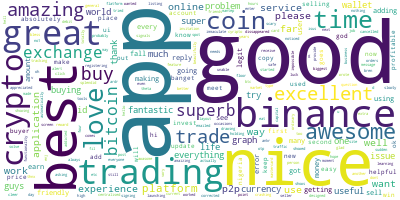

In [69]:

# Generate a word cloud on the preprocessed data
wordcloud.generate(long_string_5)

# Visualize the word cloud to have an idea about the issues
wordcloud.to_image()

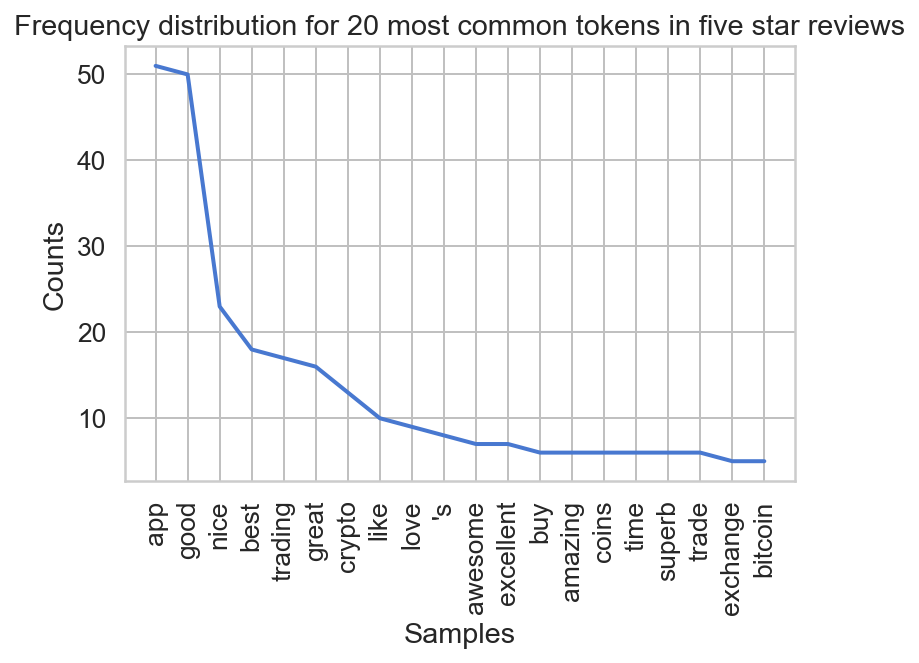

<AxesSubplot:title={'center':'Frequency distribution for 20 most common tokens in five star reviews'}, xlabel='Samples', ylabel='Counts'>

In [70]:
long_stringmc5 = long_string_5.lower()
long_stringmc_token5 = nltk.word_tokenize(long_stringmc5)

sorted_5 = [word for word in long_stringmc_token5 
             if word not in stop_words]


fdist5 = FreqDist(sorted_5)

fdist5.plot(20,title='Frequency distribution for 20 most common tokens in five star reviews')

In [71]:
data_5 = five_score.content.values.tolist()
data_words_5 = list(sent_to_words(data_5))
# remove stop words
data_words_5 = remove_stopwords(data_words_5)
print(data_words_5[:1][0][:30])

[]


In [72]:
id2word_5 = corpora.Dictionary(data_words_5)
# Create Corpus
texts_5 = data_words_5
# Term Document Frequency
corpus_5 = [id2word_5.doc2bow(text) for text in texts_5]
# View
print(corpus_5[:1][0][:30])

[]


In [73]:
# Build LDA model
lda_model_5 = gensim.models.LdaMulticore(corpus=corpus_5,
                                       id2word=id2word_5,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model_5.print_topics())
doc_lda_5 = lda_model_5[corpus]

[(0,
  '0.096*"app" + 0.084*"nice" + 0.039*"best" + 0.015*"good" + 0.014*"great" + '
  '0.013*"love" + 0.013*"way" + 0.013*"application" + 0.013*"crypto" + '
  '0.012*"reply"'),
 (1,
  '0.077*"app" + 0.035*"like" + 0.034*"best" + 0.032*"crypto" + 0.029*"nice" + '
  '0.023*"trading" + 0.021*"great" + 0.018*"amazing" + 0.012*"life" + '
  '0.012*"experience"'),
 (2,
  '0.255*"good" + 0.059*"app" + 0.033*"trading" + 0.020*"trade" + '
  '0.020*"super" + 0.020*"superb" + 0.014*"graph" + 0.014*"time" + '
  '0.014*"many" + 0.014*"crypto"'),
 (3,
  '0.030*"app" + 0.030*"excellent" + 0.016*"best" + 0.016*"time" + '
  '0.016*"messed" + 0.016*"crashes" + 0.016*"credentials" + 0.016*"gets" + '
  '0.016*"login" + 0.016*"make"'),
 (4,
  '0.030*"nice" + 0.030*"app" + 0.030*"awesome" + 0.021*"trading" + 0.018*"id" '
  '+ 0.018*"want" + 0.018*"time" + 0.016*"good" + 0.016*"excellent" + '
  '0.016*"please"'),
 (5,
  '0.042*"excellent" + 0.028*"nice" + 0.028*"platform" + 0.015*"awesome" + '
  '0.015*"cryp

In [74]:
word_dict = {};
for i in range(num_topics):
    words = lda_model_5.show_topic(i, topn = 20)
    word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,app,app,good,app,nice,excellent,trading,great,app,great
1,nice,like,app,excellent,app,nice,good,app,trade,awesome
2,best,best,trading,best,awesome,platform,app,crypto,buy,one
3,good,crypto,trade,time,trading,awesome,buy,life,good,love
4,great,nice,super,messed,id,crypto,coins,changed,online,app
5,love,trading,superb,crashes,want,far,best,superb,banget,guys
6,way,great,graph,credentials,time,best,like,love,know,work
7,application,amazing,time,gets,good,trading,love,nigeria,try,get
8,crypto,life,many,login,excellent,yet,sell,indicators,coins,want
9,reply,experience,crypto,make,please,bought,getting,fast,bitcoin,fed


In [75]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared_5 = gensimvis.prepare(lda_model_5, corpus_5, id2word_5)
#pyLDAvis.display(LDAvis_prepared_5, template_type='notebook')
# pyLDAvis.display is not working so i would just save the data to a html instead. 
pyLDAvis.save_html(LDAvis_prepared_5, 'lda5.html')

# Comparative Analysis
For comaprative analysis, we can get reviews for one of the competitors to see in what ways the app can be improved on. For this we will only review the five star scores.

In [76]:
competitor_package = [
   # "com.binance.dev" #Binance
   #'com.paypal.android.p2pmobile', #Paypal
    'co.mona.android' #Crypto.com
    #'piuk.blockchain.android', #blockchain.com wallet
    #'com.wallet.crypto.trustapp', #trust crypto wallet
    #'com.coinbase.android'
]

In [77]:
competitor_infos= []
for ap in tqdm(competitor_package):
    info = app(ap, lang='en', country='US') # from the US markert
    del info['comments']
    competitor_infos.append(info)

100%|██████████| 1/1 [00:31<00:00, 31.12s/it]


In [78]:
print_json(competitor_infos[0])

{
  "adSupported": null,
  "androidVersion": "5.0",
  "androidVersionText": "5.0 and up",
  "appId": "co.mona.android",
  "containsAds": false,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "Download the Crypto.com App and sign up for an account in minutes. Start earning up to 6.5% p.a. on your crypto. Grow your digital assets now!\r\n\r\nWith Crypto.com you can:\r\n- Earn up to 6.5% per annum (p.a.) on your crypto; 12% p.a. on stablecoins\r\n- Get a Metal Visa Card (up to 8% Rewards back)\r\n- Buy/sell 80+ cryptocurrencies at True Cost\r\n- Deposit crypto, get an instant loan*\r\n- App users can trade on Crypto.com Exchange instantly\r\n\r\nOur first product is the Crypto.com Visa Card (formerly known as MCO Card):\r\n- A beautifully crafted metal Visa card\r\n- Up to 8% Rewards back on card spending (based on card tier)\r\n- Music and movie subscriptions rebates on selected streaming services**\r\n- Unlimited access to 1000+ 

In [79]:
competitor_reviews = []

# Loop through all the app packages and collect review for each of them
for ap in tqdm(competitor_package):
    for score in list(range(1, 6)):
        for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
            rvs, _ = reviews(
                ap,
                lang='en',
                country='uk',
                sort=sort_order,
                count= 150 if score == 3 else 200,
                filter_score_with=score
            )
        for r in rvs:
            r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
            r['appId'] = ap

        competitor_reviews.extend(rvs)

100%|██████████| 1/1 [00:59<00:00, 59.03s/it]


In [80]:
print("We were able to scrap: ", len(competitor_reviews), " reviews")

We were able to scrap:  950  reviews


In [81]:
# Save app reviews in a CSV format
df_competitor = pd.DataFrame(competitor_reviews)
df_competitor.to_csv('./competitor.csv', index=None, header=True)

In [82]:
df_competitor.tail()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
945,gp:AOqpTOEh0LgXofMKeq4rRXFPqU2VTcPcrF40XyDGwpt...,Michael Eade,https://play-lh.googleusercontent.com/a-/AOh14...,Fun and easy to use.,5,0,3.88.1,2021-04-02 07:57:07,None,NaT,newest,co.mona.android
946,gp:AOqpTOGFNCz1rBdV14qbXecNc7ZAxE7YNy6g7HlMXJq...,Noel E Rodriguez,https://play-lh.googleusercontent.com/a-/AOh14...,Good,5,0,3.88.1,2021-04-02 07:50:10,None,NaT,newest,co.mona.android
947,gp:AOqpTOFMV3ZFCee3ZledPLDdJwvEHCepagF_TG3E6r2...,Garrett Saunders,https://play-lh.googleusercontent.com/-9DuOwIR...,Let's go to the moon boys,5,0,3.89.0,2021-04-02 07:46:18,None,NaT,newest,co.mona.android
948,gp:AOqpTOHRv5wNBG--UnM_g7NLqc1_Rh6XduJf_WbPH_h...,Steve Saxon,https://play-lh.googleusercontent.com/a-/AOh14...,Cool crypto app,5,0,3.88.1,2021-04-02 07:45:37,None,NaT,newest,co.mona.android
949,gp:AOqpTOFRulxHIl-NbfHNN2wKOKefrzAmJr6B7TBDaOy...,Eazyinks,https://play-lh.googleusercontent.com/a-/AOh14...,Good app,5,0,3.89.0,2021-04-02 07:45:20,None,NaT,newest,co.mona.android


# Topic Modeling for Five Star Reviews of Competitor

In [83]:
# first we isolate five star reviews since it is our focus for this analysis
score = [5]
competitor_five_star = df_competitor[df_competitor['score'].isin(score)]

In [84]:
# Join the different processed titles together.
competitor_long_string = ','.join(list(competitor_five_star['content'].values))

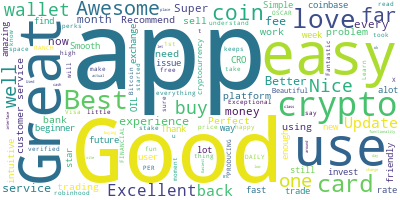

In [85]:

# Generate a word cloud on the preprocessed data
wordcloud.generate(competitor_long_string)

# Visualize the word cloud to have an idea about the issues
wordcloud.to_image()

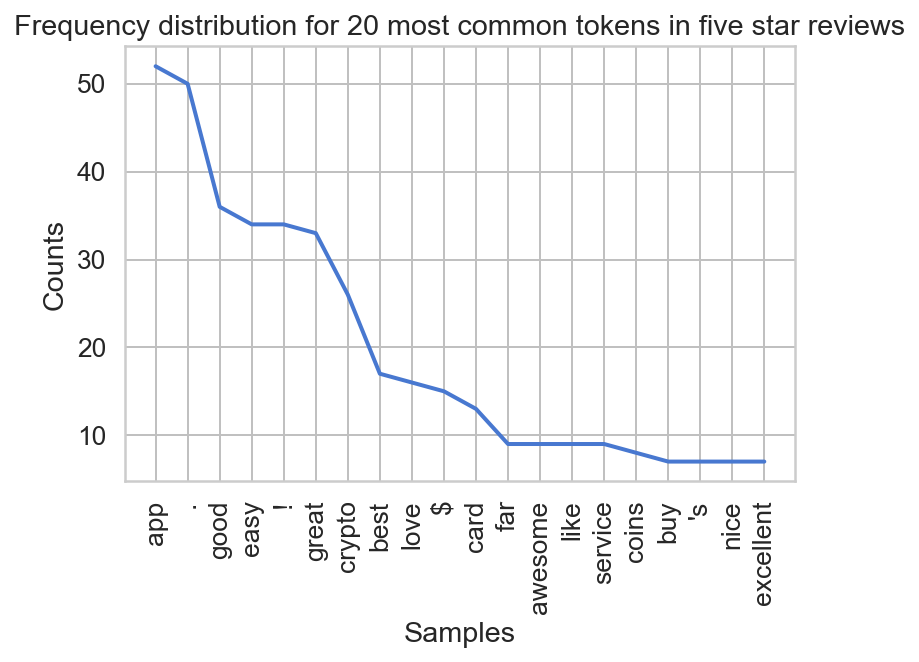

<AxesSubplot:title={'center':'Frequency distribution for 20 most common tokens in five star reviews'}, xlabel='Samples', ylabel='Counts'>

In [86]:
competitor_string = competitor_long_string.lower()
long_stringmc_competitor = nltk.word_tokenize(competitor_string)

sorted_competitor = [word for word in long_stringmc_competitor 
             if word not in stop_words]


fdist_competitor = FreqDist(sorted_competitor)

fdist_competitor.plot(20,title='Frequency distribution for 20 most common tokens in five star reviews')

In [87]:
data_compete = competitor_five_star.content.values.tolist()
data_words_compete = list(sent_to_words(data_compete))
# remove stop words
data_words_compete = remove_stopwords(data_words_compete)
print(data_words_compete[:1][0][:30])

['beautiful', 'platform', 'monopolize', 'cryptocurrency']


In [88]:
id2word_compete = corpora.Dictionary(data_words_compete)
# Create Corpus
texts_compete = data_words_compete
# Term Document Frequency
corpus_compete = [id2word_compete.doc2bow(text) for text in texts_compete]
# View
print(corpus_compete[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1)]


In [89]:
# Build LDA model
lda_model_compete = gensim.models.LdaMulticore(corpus=corpus_compete,
                                       id2word=id2word_compete,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model_compete.print_topics())
doc_lda_compete = lda_model_compete[corpus]

[(0,
  '0.077*"love" + 0.064*"app" + 0.036*"good" + 0.029*"crypto" + 0.026*"great" '
  '+ 0.018*"amazing" + 0.018*"card" + 0.012*"far" + 0.012*"started" + '
  '0.012*"st"'),
 (1,
  '0.092*"app" + 0.047*"crypto" + 0.046*"best" + 0.046*"good" + '
  '0.014*"experience" + 0.014*"coins" + 0.014*"find" + 0.014*"buy" + '
  '0.014*"ever" + 0.014*"perfect"'),
 (2,
  '0.028*"easy" + 0.023*"app" + 0.022*"good" + 0.022*"best" + 0.016*"far" + '
  '0.016*"awesome" + 0.014*"oil" + 0.014*"wells" + 0.011*"service" + '
  '0.011*"still"'),
 (3,
  '0.123*"easy" + 0.045*"app" + 0.045*"good" + 0.027*"update" + 0.018*"great" '
  '+ 0.018*"back" + 0.018*"like" + 0.010*"experience" + 0.010*"nice" + '
  '0.010*"hai"'),
 (4,
  '0.029*"app" + 0.029*"crypto" + 0.020*"love" + 0.020*"get" + 0.010*"good" + '
  '0.010*"card" + 0.010*"best" + 0.010*"sell" + 0.010*"using" + '
  '0.010*"changing"'),
 (5,
  '0.032*"super" + 0.022*"easy" + 0.022*"app" + 0.022*"btc" + 0.022*"awesome" '
  '+ 0.022*"exceptional" + 0.021*"say"

In [90]:
word_dict = {};
for i in range(num_topics):
    words = lda_model_compete.show_topic(i, topn = 20)
    word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,love,app,easy,easy,app,super,crypto,good,easy,great
1,app,crypto,app,app,crypto,easy,card,app,nice,app
2,good,best,good,good,love,app,easy,card,great,crypto
3,crypto,good,best,update,get,btc,app,back,coins,service
4,great,experience,far,great,good,awesome,alonzo,months,good,works
5,amazing,coins,awesome,back,card,exceptional,stolen,great,also,best
6,card,find,oil,like,best,say,amelia,easy,excellent,actual
7,far,buy,wells,experience,sell,like,best,one,app,buy
8,started,ever,service,nice,using,great,martinez,money,crypto,banks
9,st,perfect,still,hai,changing,best,ok,make,card,way


In [91]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared_compete = gensimvis.prepare(lda_model_compete, corpus_compete, id2word_compete)
#pyLDAvis.display(LDAvis_prepared_compete, template_type='notebook')
# pyLDAvis.display is not working so i would just save the data to a html instead. 
pyLDAvis.save_html(LDAvis_prepared_compete, 'lda_competitor.html')